In [3]:
from IPython.display import Image, display

# Project Happiness

## 1) Overview and goals of the model 

The intended final goal for the model was to generate a forecasted Happiness score (World Happiness Report : https://worldhappiness.report/) for the next 6 years, considering the connection between the score and the GDP per capita parameter. To achieve this - two main sources for data have been considered. The first is data for already published editions of the Happiness Reports, along with the research done in order to make the score. The second source is the long-term forecast for GDP per capita by IMF for countries around the world. Challenges of each dataset will be discussed in the second section.

The model aims to achieve its goal by evaluating the importance of the GDP per capita metric respective to the perceived happiness of people living in a certain country/territory. An important limitation to the score is that highest value cannot exceed 10 and it can go down below 1. To be noted and, then later expanded on, is that the Happiness score contains variables with significant weight which cannot be adjusted with conventional research, but rather need a more in-depth look into the population's personal affairs which are the biggest driver (having the biggest weight) of the overall feeling of happiness in people.

Therefore, it was taken into consideration that predictions for these interpersonal/personal circumstances cannot be done and as such their weight must remain unchanged/fixed. For the purpose of the model, each country has a consideration for average weight for these modules and only impact by changes in GDP per capita has been considered to sway the level of the score in one way or the other. 

Furthermore, the original intention was to look into the possibility of higher GDP per capita impacting the perception of people when it comes to trust in their governments/corruption perception. Even though such hypothesis seemed plausible, after examining the data, such connection was not pursued further.

Lastly, due to the complexity of the GDP per capita metric, an already available one was used - published by the IMF - to ensure correctness of the figures. Both past and forecasted data was available in the same dataset, so past GDP per capita values has been taken from the source as well for consistency. 

## 2) Data sources

As already mentioned above, several data files were used to compile the ready-for-analysis data. 

The most important of source was historical data for the score's previous publications. The files used were from year 2015 (2015 Happiness report) up to 2022 (latest edition of the report available) and were combined into one big dataset, holding all of the information needed for the model's development. Structurally, the data is presented as: final index value, happiness score, along with ranking of each country by its respective score each year, and the weights of the factors which play a role in calculating the score - namely GDP per capita (sometimes referred to as Economy), Family, Health (or Life Expectancy), Freedom, Trust government/corruption perception, Generosity and Distopia Residual. Furthermore, a standard error variable is also always present in the datasets. As discussed already - the interpersonal/personal factors' values take up the majority of the score's weight, but due to the complexity of factors such as Family and Generosity (for example), no meaningful forecast can be done on them. It was therefore decided that all other factors except the GDP per capita will be considered at their average value, for the purpose of achieving plausible score level. 

It is worth noting that some of the datafiles had more or less columns (usually secondary or descriptive to the variables) than the described above. Again for consistency, only features part of the weight of the score were considered. 

Further inconsistencies of the files were:
- multiple ways for the same country to be referred to
- different countries being included in the report from cycle to cycle, which led to missing values for such locales
- inappropriate formatting of the values in the feature
- differences in the way features were named, missing features, etc. 

Overcoming those inconsistencies will be discussed in the next portion of the overview.

The second dataset used contains the GDP per capita data from 1980 up to 2022. The difficulties with this datafile were considerably less, but not absent - majority arising from missing values for some countries, again due to mostly geopolitical reasons - countries seizing to exist or starting to exist.

## 3) Cleaning/tidying decisions

In order to achieve ready-for-analysis data, the inconsistencies already described previously had to be resolved. 

When it comes to the Happiness score datasets - multiple data tidying/cleaning decisions had to be made to compile the final dataset containing only the country, the country score and the weight of the GDP per capita (the variable of interest).

The steps that were taken were:
 - extracting only the features needed from each dataset - score, GDP per capita and country
 - assessing the extracted countries from all country features of each data set
 - evaluating whether the data held for each country is enough to proceed with further analysis; it was necessary because there were territories where multiple years of data were missing and in the worst cases, it was data from various years - for example, the country appears in 2015 and then again only 2017 and 2018, only to reappear again in 2022. 
 - handling the different ways the countries were written between data files - in order achieve an uniform list of countries and the multiple names they appeared in the data, the library fuzzywuzzy was utilized. It uses Levenshtein distance in order to map potential duplicate country names. To be noted is that for several of the countries such as Hong Kong, Taiwan, Czech Republic, Macedonia, Cyprus and Congo, different ratios of matching were needed due to the big difference in their names across the sets.   
 - removing duplicates - some countries like Congo and Cyprus were considered one country rather than 2 different ones; therefore, an average between the 2 scores was calculated and it was used to make one single prediction value. On the other hand, the opposite is true for other countries such as Hong Kong and Taiwan, where they were considered as part of China. This was done due to the differences between the China and the two other countries in terms of development, and also was based on the fact that for Hong Kong, specifically, the happiness score was impacted significantly by the geopolitical change. 
 - assessing how to handle missing values - upon locating the missing values different approaches were taken in order to be replaced with a valid input - in some cases after looking into the raw data, it made sense to simply fill the missing values with zeroes. In others, however, average between the previous or next 3 years were taken so that there is consistency of the data. Special mention here would be the corruption perception feature, where multiple countries spanning through across multiple years had 0 in their weight to the score. The majority of those counties were either in the Middle East or Eastern Europe, where regimes or the fear of punishment against speaking ill of influential political figure may have caused harm to the individual interviewed, and, therefore, such missing values had to be replaced with their original figure from the dataset (as a zero).
 - lastly, as some datasets were missing features which were important to the analysis (such as ranking) - those features were added by calculation using Python/nympy functions
 
The end result of the data cleaning up was a feature containing 137 countries out of an average of 150 with consistent data presence throughout the datasets and features for each year of the score - from 2015 until 2022 for score, rank, GDP weight. 

The second dataset was the IMF data on GPD per capita - changes done to the set were:
 - extracting and evaluating the financial data included in the set - unfortunately, there was data missing for some of the countries in the happiness score dataset, which was handled by removing the countries which had inconsistent data. That meant that the dataset observations fell from 137 to 129. 
 - countries were mapped between the happiness set and GDP per capita set with the help of the fuzzy wuzzy library
 
The final end table, which was used for the analysis, contained 129 country names in the country feature, the features from the cleaned happiness dataset and the new features - 1 for each year from 2015 up to 2028.

## 4) Analysis of old data

As the structure of the score itself is based on a weighted value of each factor, this automatically means that there is a correlation between the score and the GDP per capita movements between the years.

From the analysis became apparent that there are 2 ways that the GDP movements impact the final score:
 - by fluctuating in the weight of the GDP factor - hence if in 2015, the GDP was at certain amount, and then 2016, changed either in upward or downward, it would impact the weight of the GDP in the score by either driving it up or down
 - by impacting the score itself - meaning if the GDP falls or goes up - then the score itself is impacted by moving weight from one factor to another

Based on both ways described above, an overall upward trend was established where adjustment of the weight was done directly. Meaning that average upward adjustment of the weight was done to the happiness score (making the weight of the GDP factor in the score higher) by the median value for the previous years. Median was chosen rather than average due to the disproportionate changes of the GDP weight for years 2020 up to 2022.

Furthermore, based on the movements of the GDP level, the level of the overall score was changing as well. Notably, the change to the overall score was opposite to what one would expect - whenever the GDP was growing the overall score was going lower. This points to the hypothesis that whenever more money was available to people, they would overall feel less happy suggesting that higher financial stability takes from any of the other factors - while if it was going down then score was going up. One would think that the dependency between the factors would be the other way around - happiness score would go up if people had more disposable income.

In accordance with these trends, the median adjustment for each locale was calculated and applied to the score to achieve a final prediction of the score per country. 

## 5) Applying the model & results

After the main trends were identified, then the adjustment to the average values was applied to achieve the predicted scores for years 2023 to 2028. 

Full results can be found in the **Visualizations** notebook and in the **Happiness_df** notebook. Below is a summary of the top 30 countries and world map of all forecasted years.

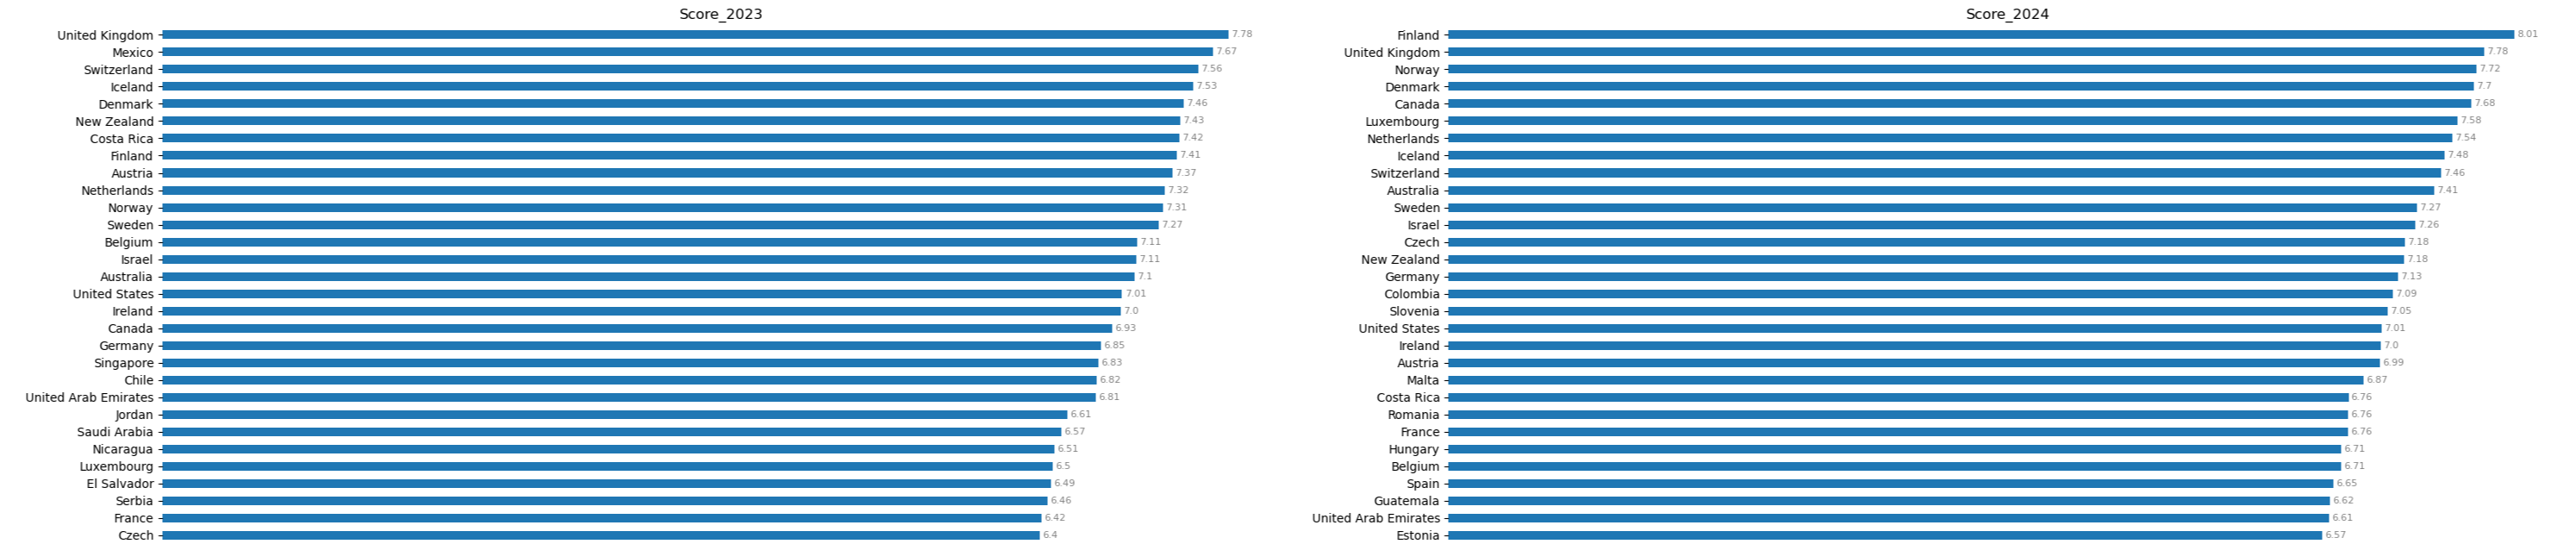

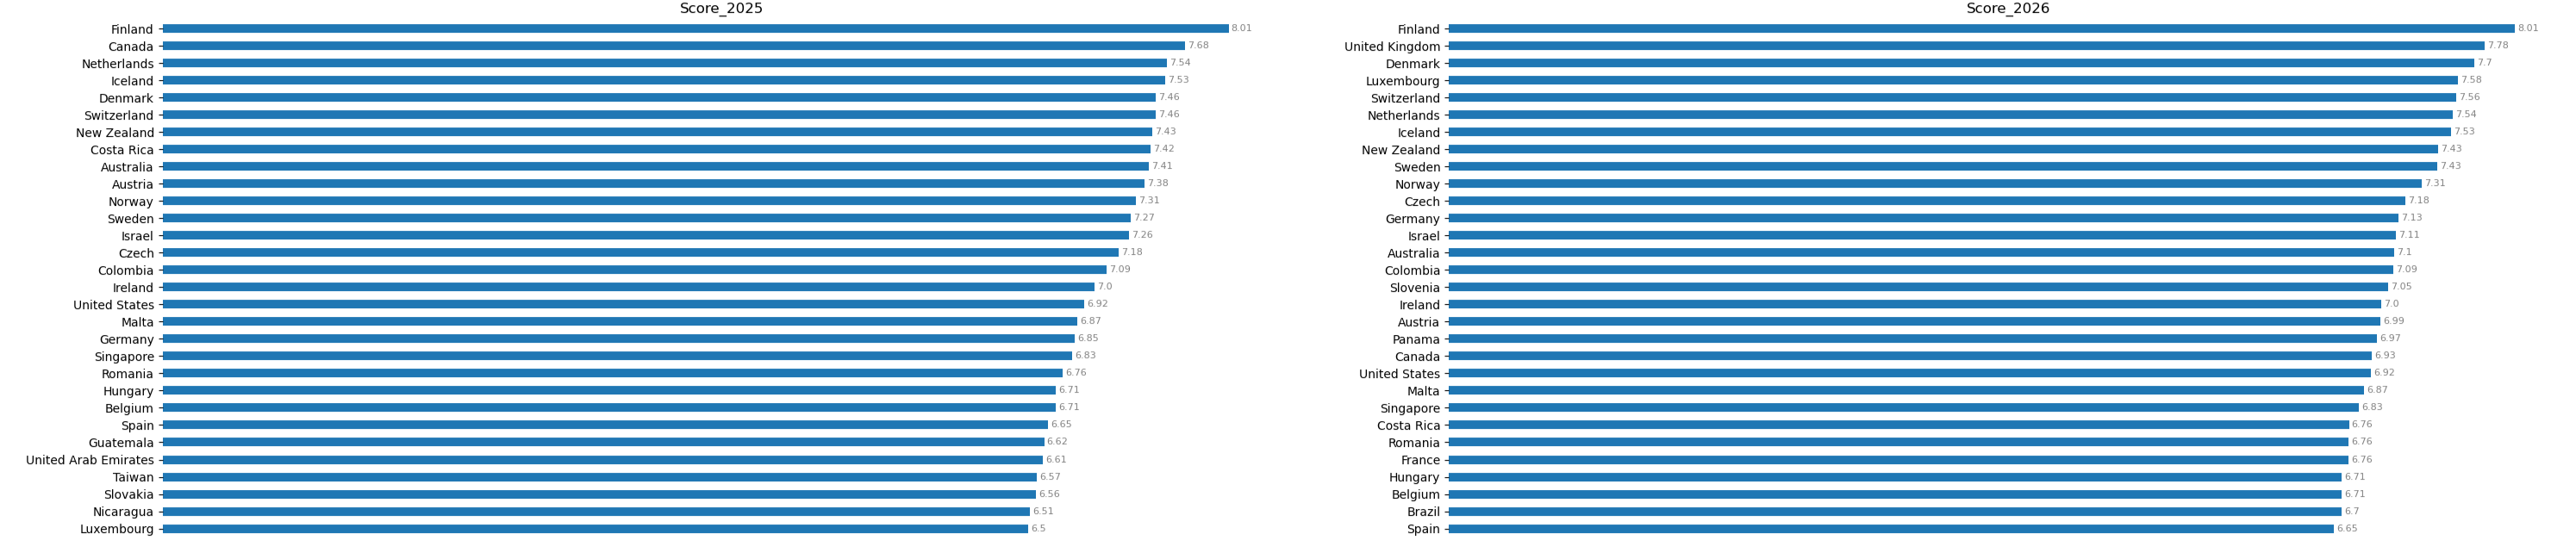

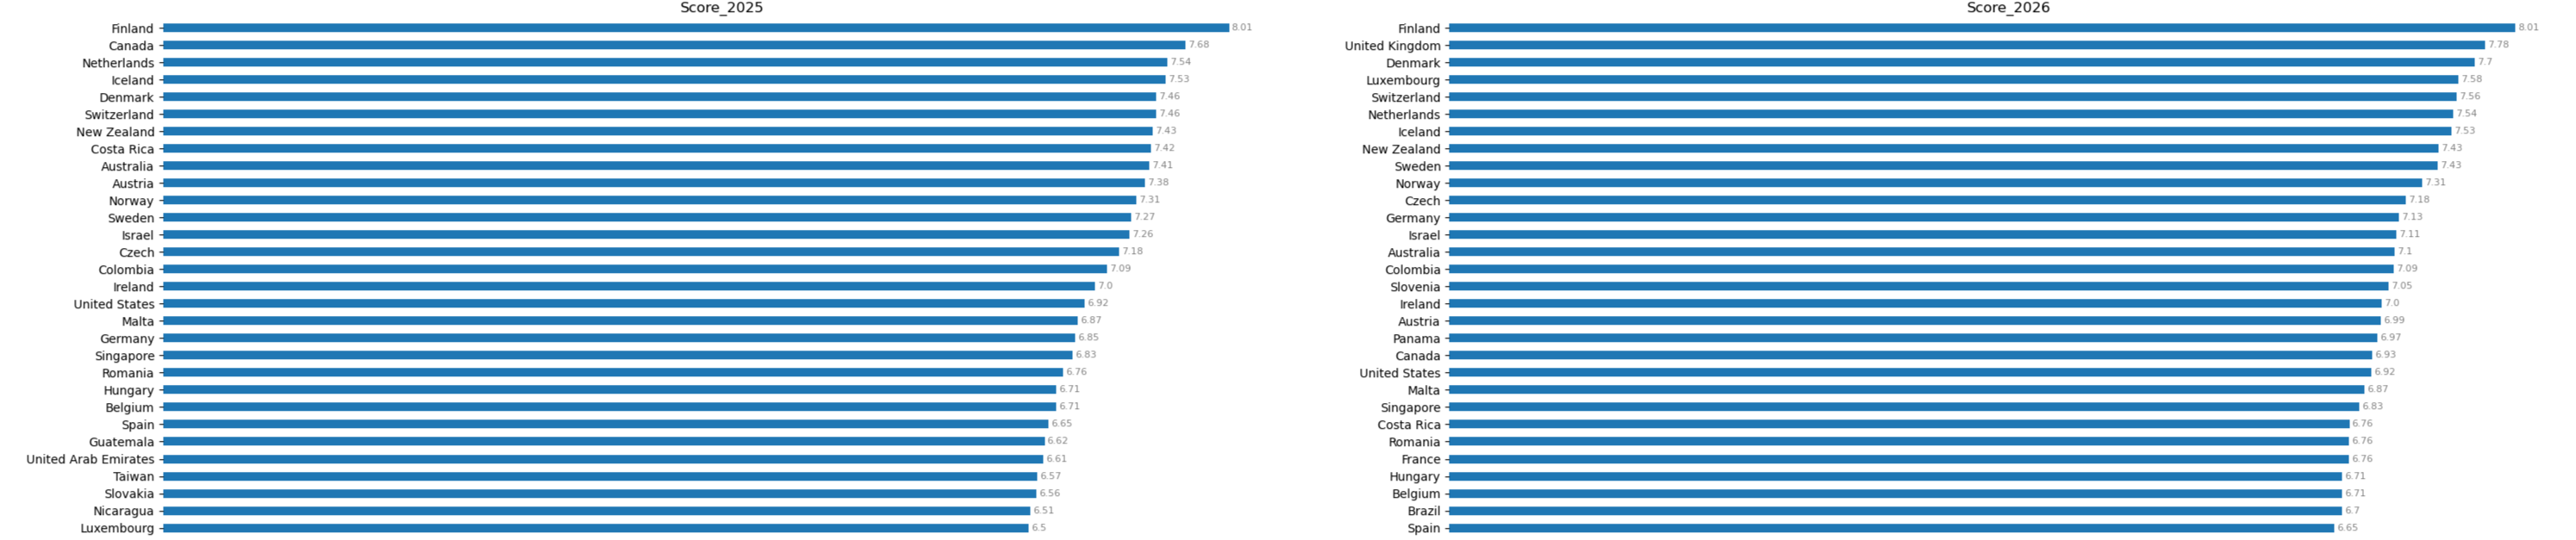

In [6]:
list_of_images = ["C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/output - 23 & 24.png","C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/output - 25 & 26.png", "C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/output - 27 & 28.png"]

for image_path in list_of_images:
    display(Image(filename=image_path))

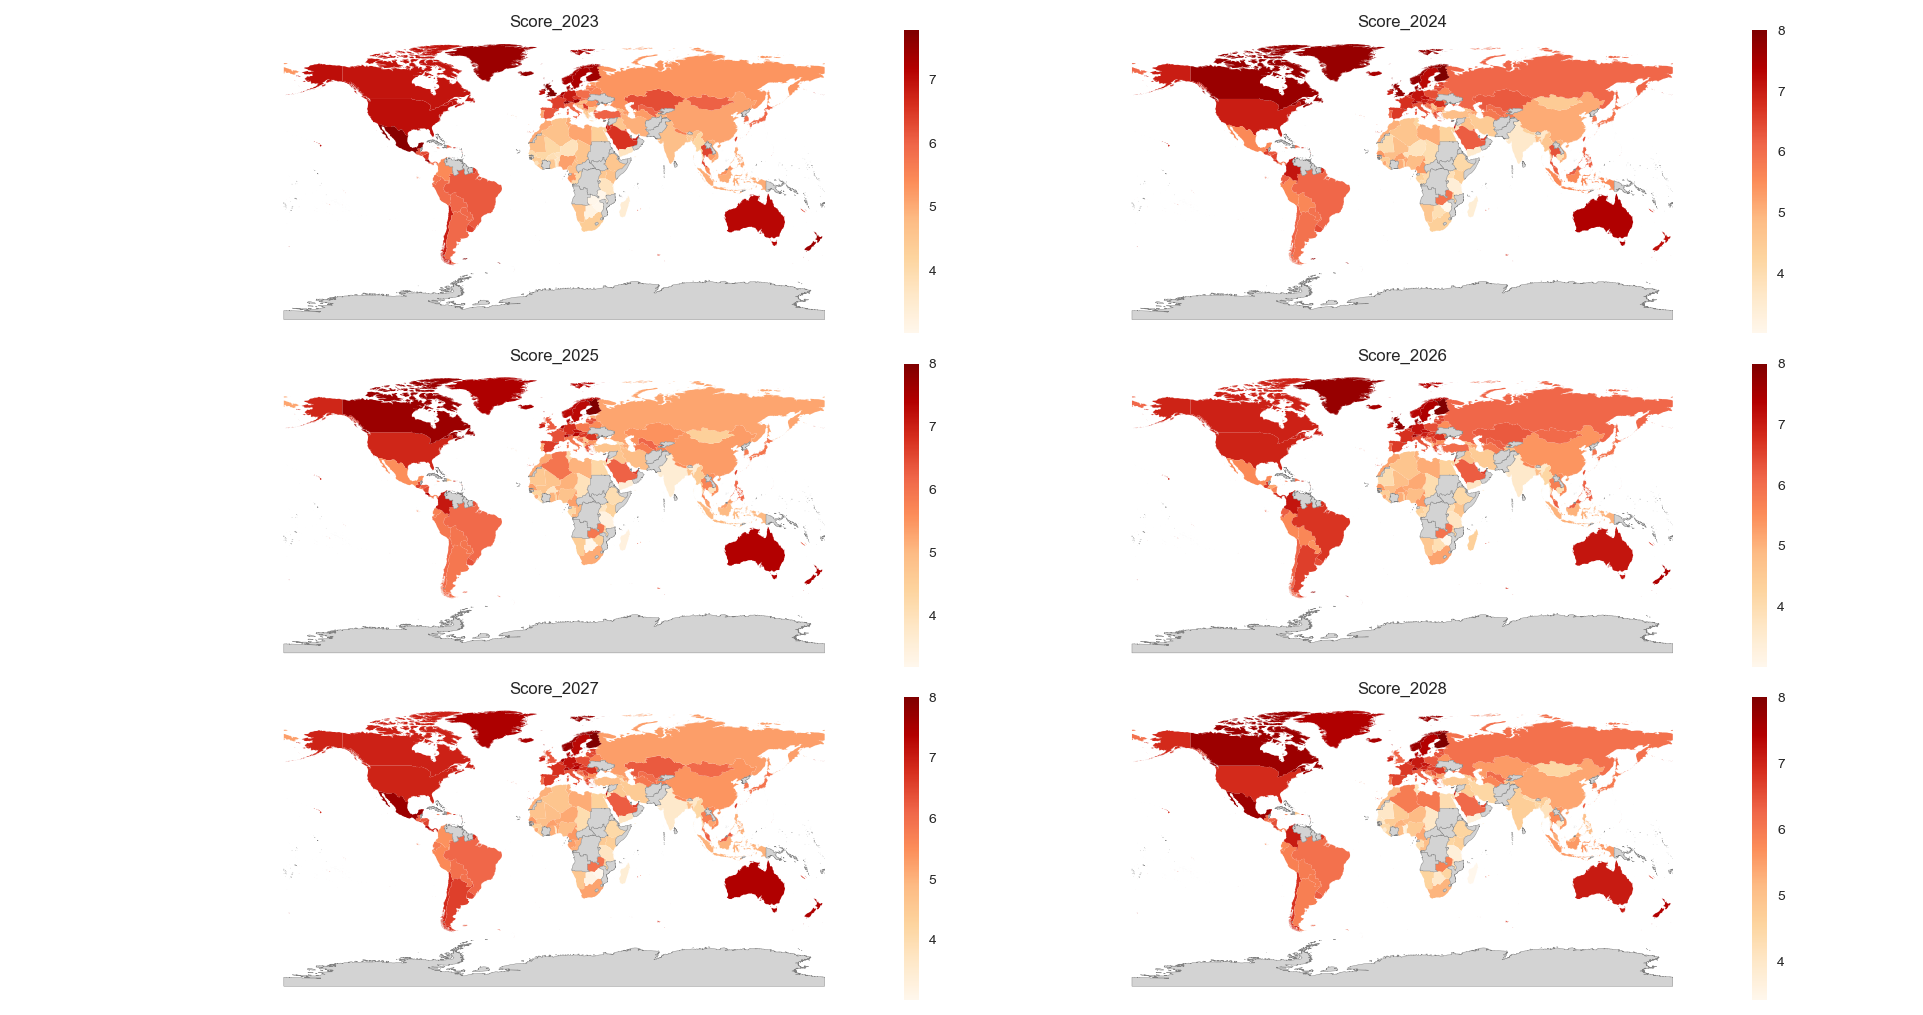

In [10]:
Image(filename="C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/Figure_1.png")

## 6) Model limitations

The model has some limitations:

- the use of the average/median only applied to the score and the weight of the GDP per capita, therefore, as discussed before forecast for those countries where GDP per capita is not the biggest driver of the score level will adjust the actual result for 2023 and onwards
- the multiple ways of referring to the same country and the changing geopolitical landscape will be a hurdle for applying the model again if subsequent years are attempted to be added to the happiness dataset
- the forecast years are interlocked with the forecast from the IMF so if new countries or data is changed, there will skew of the results
- changes to the features names in the original datafiles in new additions of the report will prevent the new data being loaded into the happiness set; in order for new data to loaded, the new names of the columns have to be changed into the code; similar is the case for the IMF datafile as well
- new subsequent mismatches of formats which is not ```float``` or ```int``` will cause a calculation error
- issue will be caused if new IMF file is attempted to be loaded to Jupyter; the original format of the file is .xls which is hard to load in Python, so a copy of it in the new excel with extension .xlsx had to be done in order for it to be loaded properly and unfortunately, direct web link in other formats was not available.

## 7) Links & sources

https://www.naturalearthdata.com/downloads/110m-cultural-vectors//

https://dataplotplus.com/plot-multiple-bar-line-plots-pandas-and-matplotlib//
https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD/

https://www.kaggle.com/datasets/mathurinache/world-happiness-report/

https://holypython.com/python-visualization-tutorial/creating-bar-chart-animations/?expand_article=1/

https://worldhappiness.report/